In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

import networkx as nx  # Library for hanling graphs (please check 4_Introduction_Graph)
import random # possibility to create random numbers (The "P" in PRM)
import numpy as np
import math

# sort nearest neighbour brute force
import heapq
import copy
# reduce coding effort by using function provided by scipy
from scipy.spatial.distance import euclidean

#### InSameConenctedComponents 
überprüft, ob die Übergebenen Punkte in der gleichen Komponente sind



In [ ]:
def inSameConnectedComponent(node1, node2, graph):
    """ Check whether to nodes are part of the same connected component using
        functionality from NetworkX
    """
    for connectedComponent in nx.connected_components(graph): 
        if (node1 in connectedComponent) & (node2 in connectedComponent):
            return True
        
    return False

### nearestNeighboursX 
sucht alle Punkte zu einem übergebenen Punkt in einem übergebenen Radius und speichert diese in aufsteigender Reihenfolge in einem Heap

In [ ]:
def nearestNeighboursX(pos, graph, radius):
    """ Brute Force method to find all nodes of a 
    graph near the given position **pos** with in the distance of
    **radius** in **increasing order**"""
    
    heap = list()
    for node in graph.nodes(data=True): # using (data=True) will generate a list of nodes with all attributes
        if euclidean(node[1]['pos'],pos) < radius:
            # use a heap-queue to sort the nodes in increasing order
            heapq.heappush(heap, (euclidean(node[1]['pos'] ,pos), node))
            #if len(heap) > 2 :
            #    break

    result = list()
    while len(heap) > 0 :
         result.append(heapq.heappop(heap)) 
    
    return result

### Gauß Funktion in Python
Über die Funktio np.random.normal(mean,sigma,n) kann eine Gauß Funktion um den Mittelwert mean mit der Standardabweichung sigma erzeugt werden. 
Über die Variable n wird angegeben wie viele Random Werte aus der Gauß Verteilung ausgegben werden sollen. Standardmäßig ist dieser Wert auf eins  

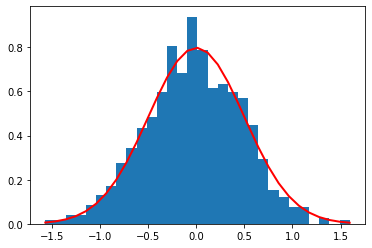

In [4]:
mu,sigma =0,0.5
s=np.random.normal(mu,sigma,1000)


count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()



### Gauß Sampling Strategie 
   1. finde einen Zufälligen Punkt im Konfigurationsraum und überprüfe diesen auf Kollision 
      * Kollisionsfrei: Punkt wird verworfen und Funktion liefert **False** zurück. 
      * Kollision: Puntk wird zwischengespeichert und X und Y Werte werden erfasst.
   2. Finde einen zweiten Punkt im Konfigurationsraum 
      * Der Abstand **d** zum zweiten Punkt wird zufällig aus einer Gaußschen Normalverteilung gewählt.
      * Wäle einen zufälligen Winkel **alpha** für die Richtung in der nach dem zweiten Punkt geschaut werden soll. 
      * Mittels dem Abstand **d** und dem Winkel **alpha** und trigonometrischen Funktionen werden die X und Y Koordinaten des zweiten Punktes berechnet. 
   3. Überprüfe den gefunden zweiten Punkt auf Kollision
    * Kollision: Punkt wird verworfen und die Funktion liefert **Fallse** zurück. 
    * Kollisionsfrei: Punkt wird zurückgeliefert -->Sampling war erfolgreich.

      
    


In [ ]:
import random #Twt

def simple_Gaussian_Sampling(collChecker):
    
    
    #Get the limites for the graph 
    limits = collChecker.getEnvironmentLimits()   
    #Get a random position within the limits    
    pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    #If selected Configuration is not free pick the Point 
    if not collChecker.pointInCollision(pos):
        return False 
    #get a distance for the second Point over a gaussian distribution 
    d=np.random.normal(1,1)
    pos_x=pos[0]
    pos_y=pos[1]
    #get a random angle between 0 and 360 
    alpha=random.uniform(0,360)*(math.pi/180)
    #calculate the new Point with the random angle and the selected distance d 
    pos2_x=d*math.cos(alpha)+pos_x
    pos2_y=d*math.sin(alpha)+pos_y
    #store the Point 
    pos2=[pos2_x,pos2_y]
    #check if the Point is collision free 
    if collChecker.pointInCollision(pos2):
        return False
    #if the point is  collision free return it 
    return pos2

    

    

In [ ]:
def learnRoadmapNearestNeighbour(graph, dim, radius, numNodes, collisionChecker):
    i = 1
    while i < numNodes:
        
        # Generate a 'randomly chosen, free configuration'
        pos = False
        while pos==False:
            pos = simple_Gaus_Sampling(collisionChecker)
        
        # Find set of candidates to connect to sorted by distance
        result = nearestNeighboursX(pos, graph, radius)
        
        # check connection
        graph.add_node(i, pos=pos)
        """
        for idx, data in enumerate(result):
            if not inSameConnectedComponent(i,data[1][0],graph):
                if not collisionChecker.lineInCollision(pos,data[1][1]['pos']):
                    graph.add_edge(i,data[1][0])
        """           
        i+=1